/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_triangulation.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  triangles = np.asarray(triangles, dtype=np.int32)
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z_check.max())
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z_check.min())
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/tri/_tricontour.py:46: ComplexWarning: Casting complex values to real discar

-16.600539620457503767


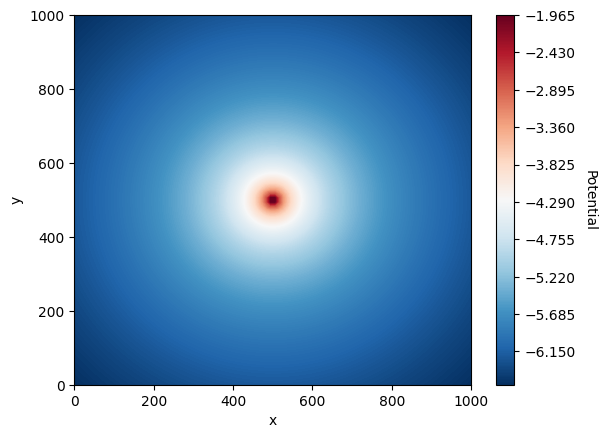

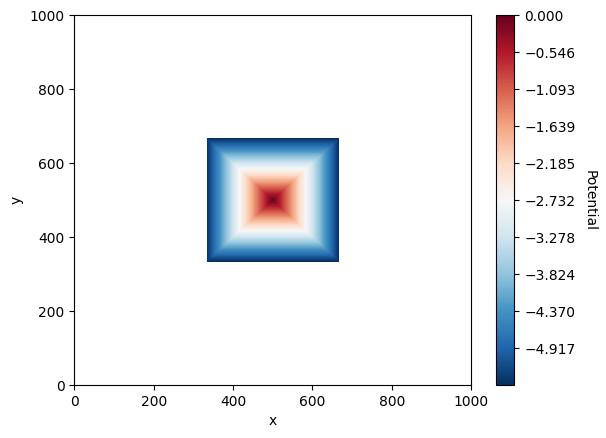

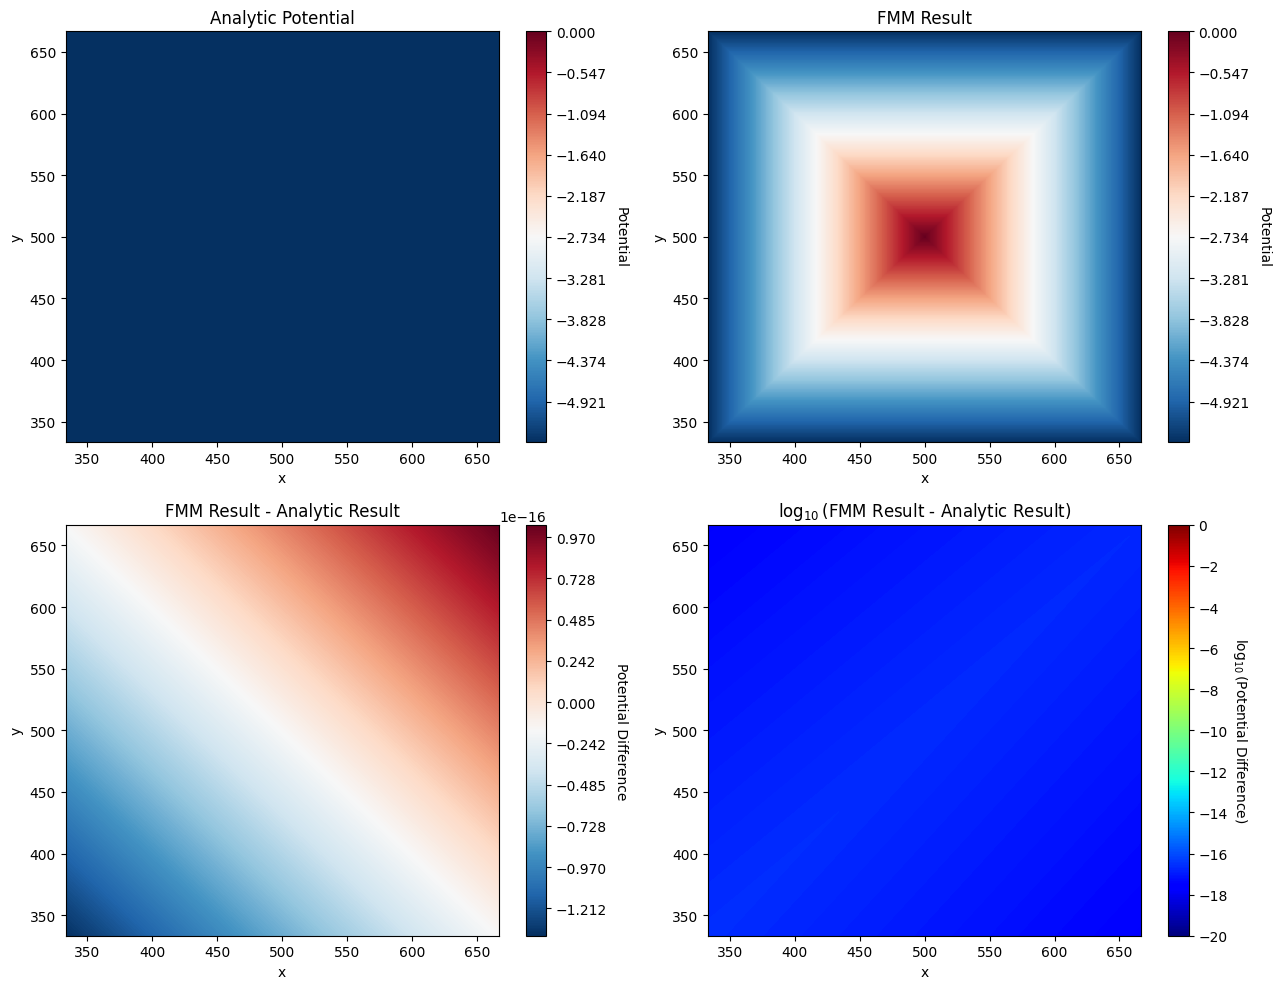

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
import copy
import modules.Utility as util


# Create particle distribution to be used in all simulations
#np.random.seed(100)
n_particles = 4
max_property = 0 # property could be mass or charge 
box_size = 1000

# Generate initial particles
#initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size
#initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size
initial_positions=[]
line_n = int(np.sqrt(n_particles))
start_inset = box_size/(line_n+1)
for x in np.linspace(start_inset, box_size - start_inset, line_n, True):
    for y in np.linspace(start_inset, box_size - start_inset, line_n, True):
        initial_positions.append(np.array([x, y])) 
initial_positions = np.array(initial_positions)

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))
    
point = 500
charge = 1
initial_particles.append(Particle(np.array([point,point]), charge))

analytic_simulation = SingleParticle([point, point], charge, box_size)
analytic_simulation.plot_potential()
analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation.evaluate_particle_potentials(analytic_particles)

# FMM Simulation
expansion_order = 0
n_levels = 0
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, fmm_particles, n_levels, p=expansion_order)
fmm_results = fmm_simulation.run(plotting = True, z_range = [None,0], x_range=[0,box_size], y_range=[0,box_size], z_levels=10000)

fmm_fig, fmm_axs = plt.subplots(2,2)
analytic_results = util.calc_potential_results(analytic_particles, fig = fmm_fig, ax = fmm_axs[0,0], z_range=[None,0], title="Analytic Potential")
fmm_results = util.calc_potential_results(fmm_particles, fig = fmm_fig, ax = fmm_axs[0,1], z_range=[None, 0], title = "FMM Result")
fmm_analytic_diff_results = util.calc_difference_results(fmm_particles, analytic_particles, fig = fmm_fig, ax = fmm_axs[1,0], z_range=[None, None], title = "FMM Result - Analytic Result")
log_fmm_analytic_diff_results = util.calc_log_relative_error_results(fmm_particles, analytic_particles, fig = fmm_fig, ax = fmm_axs[1,1], z_range=[-20,0], title = r"$\log_{10}(\text{FMM Result - Analytic Result})$")
fmm_fig.set_size_inches(13,10)
fmm_fig.tight_layout()
print(log_fmm_analytic_diff_results.max)



In [3]:
print(log_fmm_analytic_diff_results.max)

-16.600539620457503767
